Text(0.5, 1.0, 'Enchanced Image')

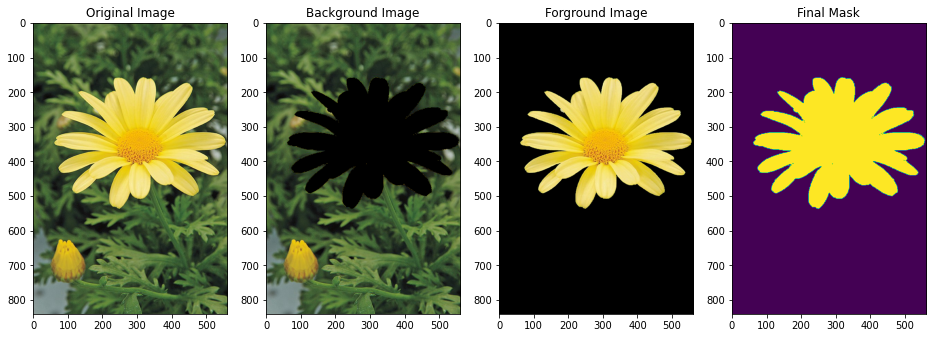

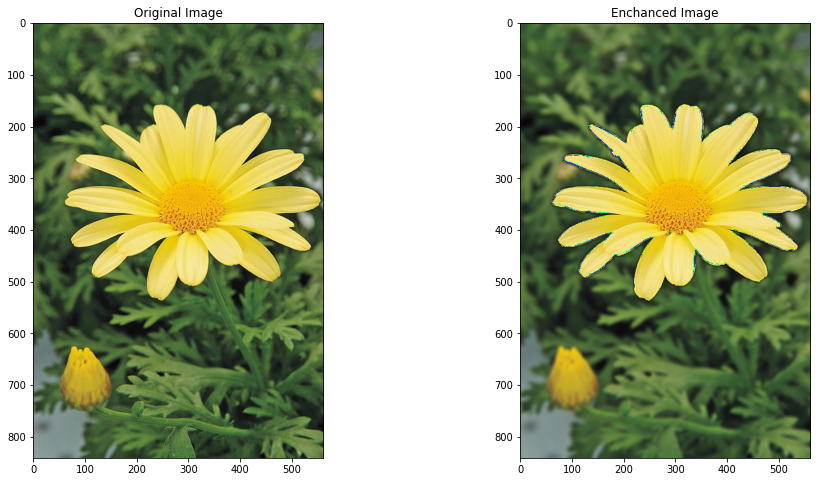

In [1]:
#Question[07]
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

daisy = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\daisy.jpg',cv.IMREAD_COLOR)
assert daisy is not None

daisy_rgb = cv.cvtColor(daisy, cv.COLOR_BGR2RGB)

mask1 = np.zeros(daisy_rgb.shape[:2],np.uint8)
bg_model = np.zeros((1,65),np.float64)
fg_model = np.zeros((1,65),np.float64)
rect = (30,70,650,550)

cv.grabCut(daisy_rgb,mask1,rect,bg_model,fg_model,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask1==2)|(mask1==0),0,1).astype('uint8')

forground = daisy_rgb*mask2[:,:,np.newaxis]
background = daisy_rgb - forground

fig, ax = plt.subplots(1,4,figsize=(16,8))
ax[0].imshow(daisy_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(background)
ax[1].set_title("Background Image")
ax[2].imshow(forground)
ax[2].set_title('Forground Image')
ax[3].imshow(mask2)
ax[3].set_title("Final Mask")


blurred_bg = cv.GaussianBlur(background, (9,9), 4)
enhanced = forground + blurred_bg

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(daisy_rgb)
ax[0].set_title('Original Image')
ax[1].imshow(enhanced)
ax[1].set_title('Enchanced Image')